In [34]:

remote_image_url = "https://img.theculturetrip.com/wp-content/uploads/2016/06/24498998325_f451c67aae_o.jpg"


In [35]:
from matplotlib import pyplot as pl

===== Describe an image - remote =====
Description of remote image: 
'a large building with towers and towers with Charminar in the background' with confidence 32.82%


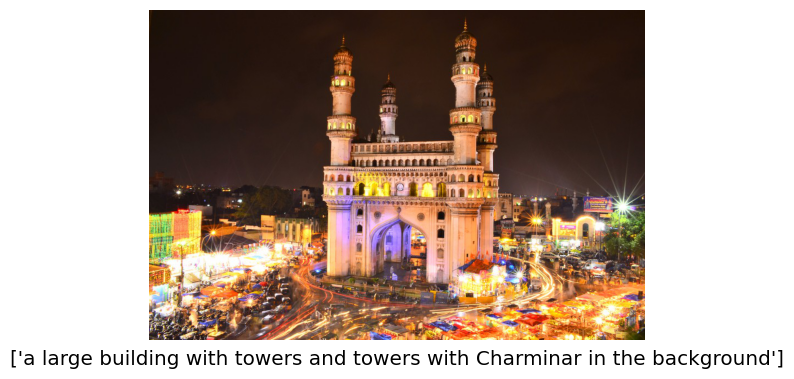

In [36]:
'''
Describe an Image - remote
This example describes the contents of an image with the confidence score.
'''
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

print("===== Describe an image - remote =====")
# Call API
#alternative to POST using computerVision Client:
description_results = computervision_client.describe_image(remote_image_url )

tmp = []
# Get the captions (descriptions) from the response, with confidence level
print("Description of remote image: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        tmp.append(caption.text)
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))
        
image = Image.open(BytesIO(requests.get(remote_image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(tmp, size="x-large", y=-0.1)
plt.show()